<a href="https://colab.research.google.com/github/Saqib2318/Crops-Disease-Prediction-App-Using-ReactJS-and-Flask-/blob/main/Five%20Crops%20Disease%20Prediction%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubham2703/five-crop-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'five-crop-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/five-crop-diseases-dataset


In [2]:
import os
import shutil

# --- CONFIGURATION ---
# The main folder shown in your image, containing 'Corn', 'Potato', etc.
ROOT_DIR = "/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease"

# The new, empty folder where all class folders will be moved
FLATTENED_DIR = "/content/flatten_data"

# Create the destination directory
os.makedirs(FLATTENED_DIR, exist_ok=True)

print(f"Starting to flatten directory structure from {ROOT_DIR}...")

# Iterate through Level 1 folders (e.g., 'Corn', 'Potato')
for crop_folder_name in os.listdir(ROOT_DIR):
    crop_folder_path = os.path.join(ROOT_DIR, crop_folder_name)

    # Check if it's a directory (i.e., Corn, Potato, Rice, etc.)
    if os.path.isdir(crop_folder_path):

        # Iterate through Level 2 folders (e.g., 'Corn___Common_Rust', 'Potato___Healthy')
        for class_folder_name in os.listdir(crop_folder_path):
            source_class_path = os.path.join(crop_folder_path, class_folder_name)
            destination_class_path = os.path.join(FLATTENED_DIR, class_folder_name)

            # We need to copy the contents of the class folder to the new flattened directory,
            # as the source is a read-only file system.
            if os.path.isdir(source_class_path):
                # Create the destination class directory
                os.makedirs(destination_class_path, exist_ok=True)
                # Copy the contents of the source class directory to the destination
                for item_name in os.listdir(source_class_path):
                    source_item_path = os.path.join(source_class_path, item_name)
                    destination_item_path = os.path.join(destination_class_path, item_name)
                    if os.path.isfile(source_item_path):
                        shutil.copy2(source_item_path, destination_item_path)
                print(f"Copied contents of class: {class_folder_name}")


print("\n--- Flattening Complete! ---")
print(f"The ready-to-split data is now in: {FLATTENED_DIR}")

Starting to flatten directory structure from /kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease...
Copied contents of class: Wheat___Yellow_Rust
Copied contents of class: Wheat___Brown_Rust
Copied contents of class: Wheat___Healthy
Copied contents of class: Bacterial Blight
Copied contents of class: Healthy
Copied contents of class: Red Rot
Copied contents of class: Corn___Northern_Leaf_Blight
Copied contents of class: Corn___Healthy
Copied contents of class: Corn___Gray_Leaf_Spot
Copied contents of class: Corn___Common_Rust
Copied contents of class: Rice___Neck_Blast
Copied contents of class: Rice___Brown_Spot
Copied contents of class: Rice___Leaf_Blast
Copied contents of class: Rice___Healthy
Copied contents of class: Potato___Healthy
Copied contents of class: Potato___Late_Blight
Copied contents of class: Potato___Early_Blight

--- Flattening Complete! ---
The ready-to-split data is now in: /content/flatten_data


In [3]:
!pip install split-folders

In [4]:

import splitfolders

# Use the folder you just created as the input
input_folder = "/content/flatten_data"
output_folder = "/content/split_data_output"

# Split into 70% train, 20% validation, 10% test
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.7, 0.2, 0.1) # Train, Validation, Test
)

Copying files: 13324 files [00:35, 373.87 files/s] 


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# Define the directory where the data was split
split_data_dir = "/content/split_data_output"

# Define image size and batch size
img_height = 128  # You can adjust this based on your model's input requirements
img_width = 128
batch_size = 32

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(split_data_dir, 'train'),
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(split_data_dir, 'val'),
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(split_data_dir, 'test'),
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Get class names immediately after loading the datasets
class_names = train_ds.class_names

print("Datasets loaded successfully.")

Found 9322 files belonging to 17 classes.
Found 2660 files belonging to 17 classes.
Found 1342 files belonging to 17 classes.
Datasets loaded successfully.


### Visualize the data
Let's visualize a few images and their labels from the training set.

['Bacterial Blight', 'Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Corn___Northern_Leaf_Blight', 'Healthy', 'Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight', 'Red Rot', 'Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Leaf_Blast', 'Rice___Neck_Blast', 'Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust']


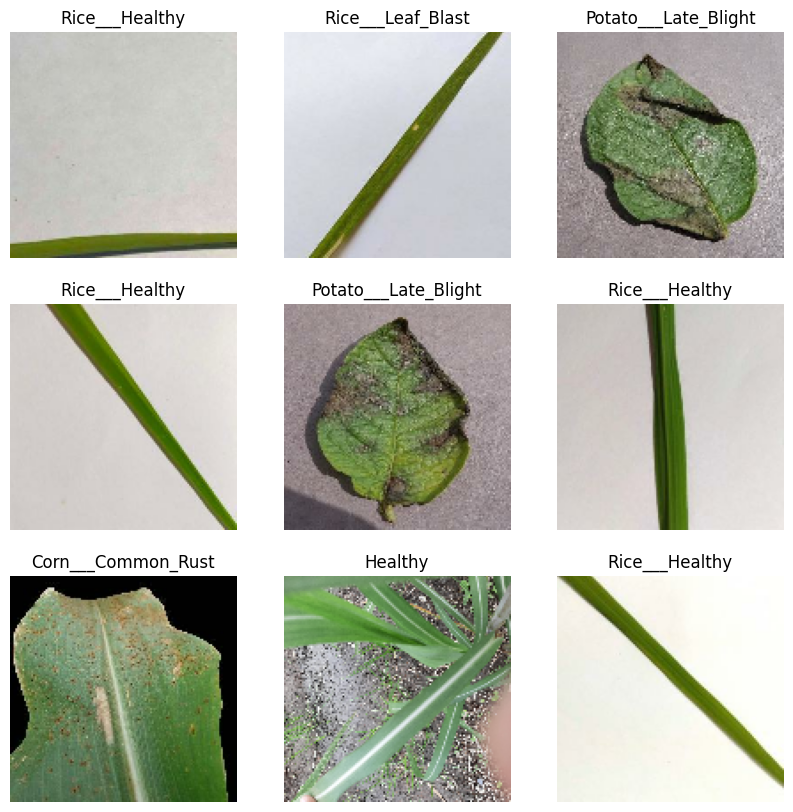

In [7]:
# Get class names before caching and prefetching
class_names = train_ds.class_names # This line is moved to the dataset loading cell
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Configure the dataset for performance
Use buffered prefetching to load images from disk without having I/O become blocking.

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

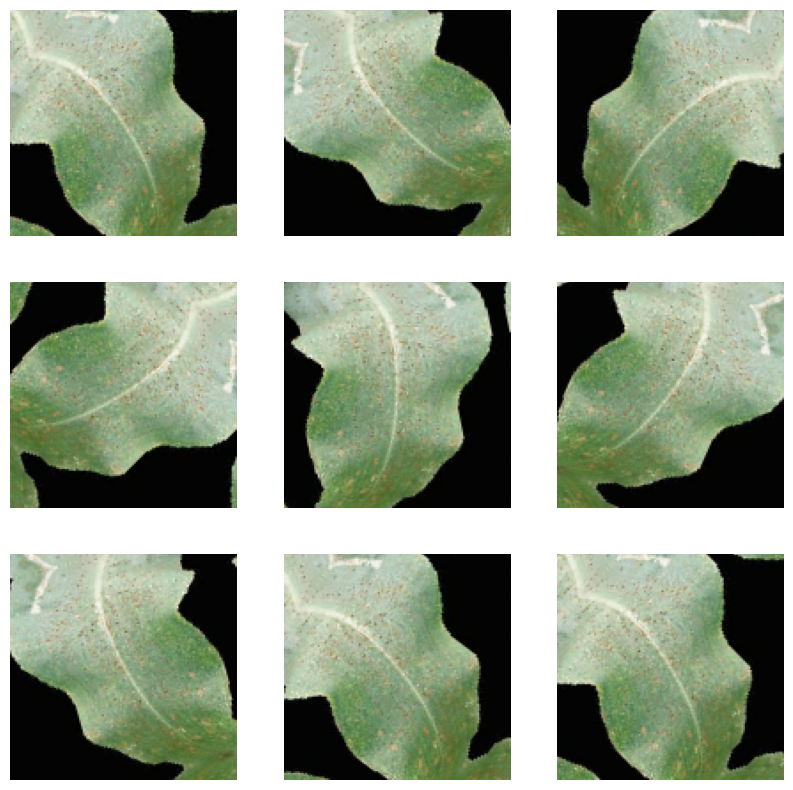

In [10]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    # Convert to float and divide by 255 for visualization
    plt.imshow(tf.cast(augmented_image[0], tf.float32) / 255.0)
    plt.axis('off')

In [11]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [12]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (img_height,img_width) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 1280)


In [14]:
base_model.trainable = False

In [15]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [17]:
prediction_layer = tf.keras.layers.Dense(len(class_names), activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 17)


In [21]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3)) # Use img_height and img_width
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 17)             │        21,777 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,279,761 (8.70 MB)

 Trainable params: 21,777 (85.07 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
len(model.trainable_variables)

2

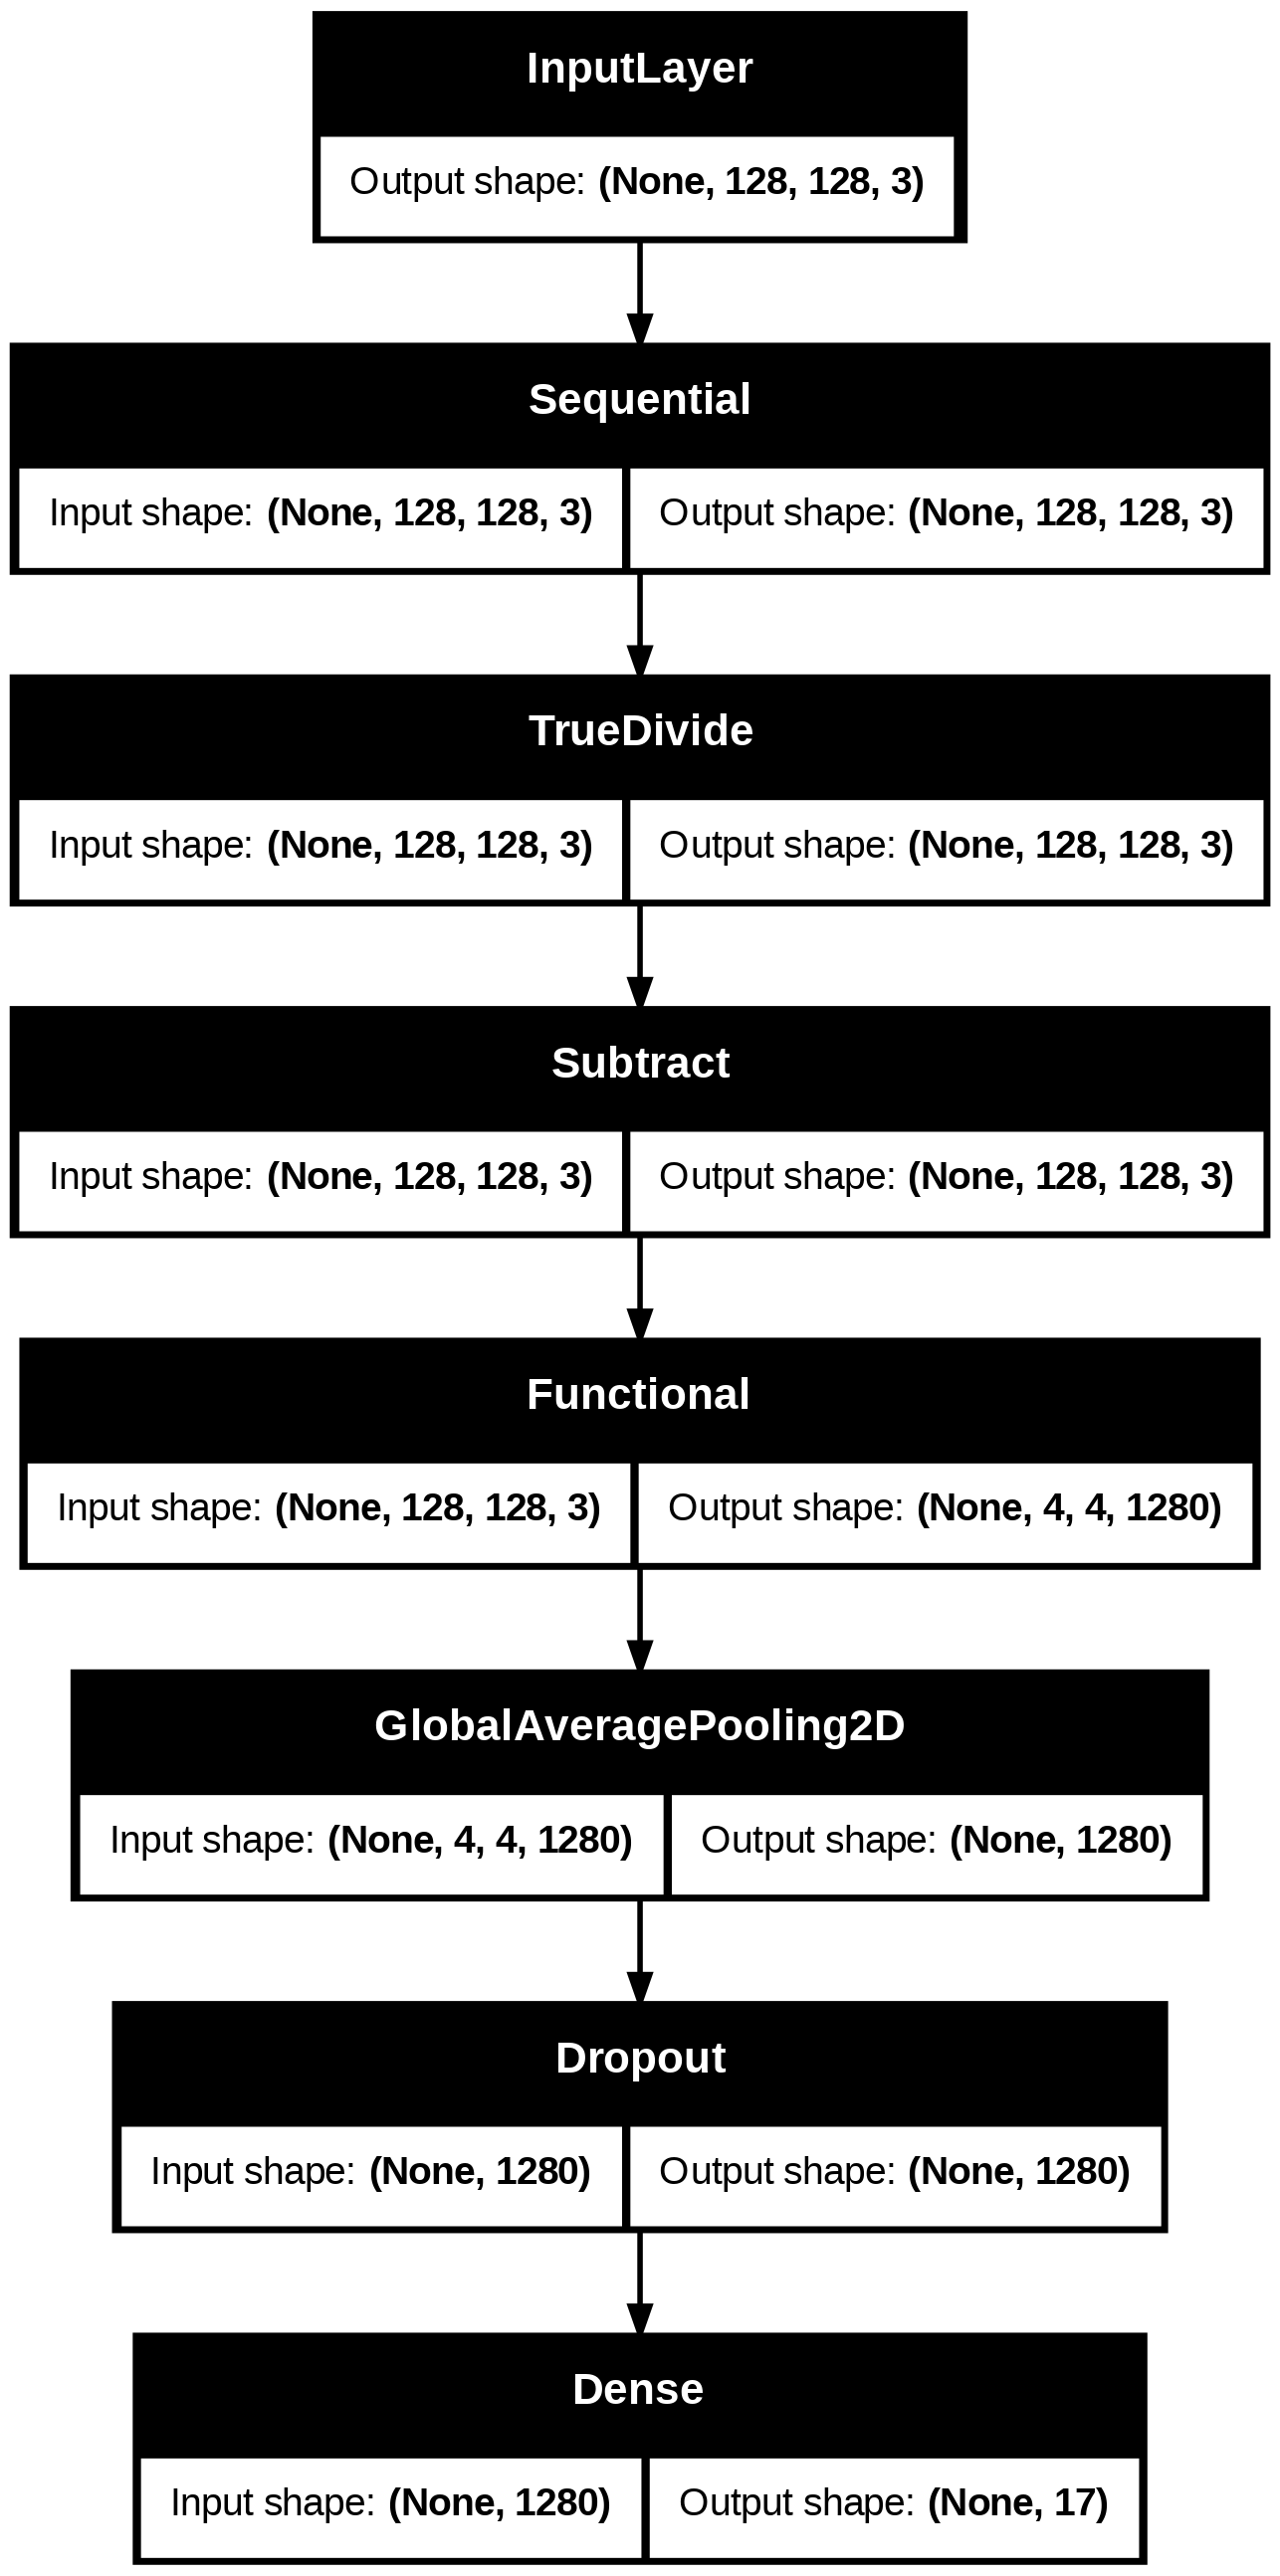

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [33]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0548 - loss: 3.5733


In [35]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=initial_epochs )

Epoch 1/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.6753 - loss: 0.9975 - val_accuracy: 0.8504 - val_loss: 0.3737
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8718 - loss: 0.3370 - val_accuracy: 0.8470 - val_loss: 0.3693
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8825 - loss: 0.2989 - val_accuracy: 0.8801 - val_loss: 0.3063
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8816 - loss: 0.2859 - val_accuracy: 0.8857 - val_loss: 0.2835
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8920 - loss: 0.2650 - val_accuracy: 0.8910 - val_loss: 0.2759
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8887 - loss: 0.2584 - val_accuracy: 0.9008 - val_loss: 0.2615
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9048 - loss: 0.2455 - val_accuracy: 0.9004 - val_loss: 0.2649
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9088 - loss: 0.2314 - val_acc

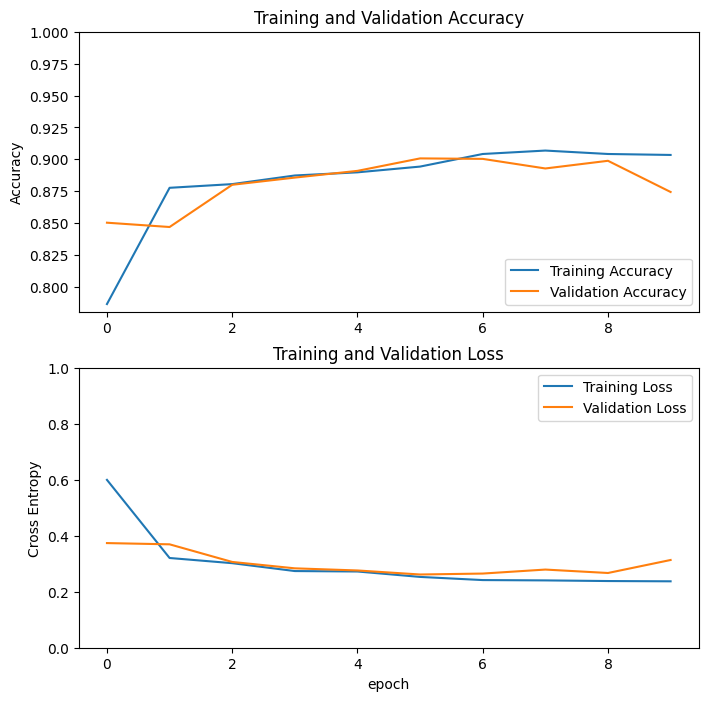

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [37]:
base_model.trainable = True

In [38]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [45]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-5), # Using RMSprop as in some transfer learning examples, with a lower learning rate for fine-tuning
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy( name='accuracy')])

In [46]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 17)             │        21,777 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,279,761 (8.70 MB)

 Trainable params: 1,883,217 (7.18 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [42]:
len(model.trainable_variables)

56

In [47]:
fine_tune_epochs = 100
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=val_ds)

Epoch 11/110


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


292/292 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.7785 - loss: 0.6431 - val_accuracy: 0.8617 - val_loss: 0.4100
Epoch 12/110
292/292 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.8695 - loss: 0.3486 - val_accuracy: 0.8744 - val_loss: 0.3631
Epoch 13/110
292/292 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.8774 - loss: 0.3218 - val_accuracy: 0.8816 - val_loss: 0.3386
Epoch 14/110
292/292 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.8921 - loss: 0.2846 - val_accuracy: 0.8929 - val_loss: 0.3069
Epoch 15/110
292/292 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.8950 - loss: 0.2715 - val_accuracy: 0.8936 - val_loss: 0.2930
Epoch 16/110
292/292 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.9025 - loss: 0.2608 - val_accuracy: 0.9026 - val_loss: 0.2724
Epoch 17/110
292/292 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.8983 - loss: 0.2522 - val_accuracy: 0.9045 - val_loss: 0.2673
Epoch 18/110
292/292 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9170 - loss: 0.2207

In [48]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

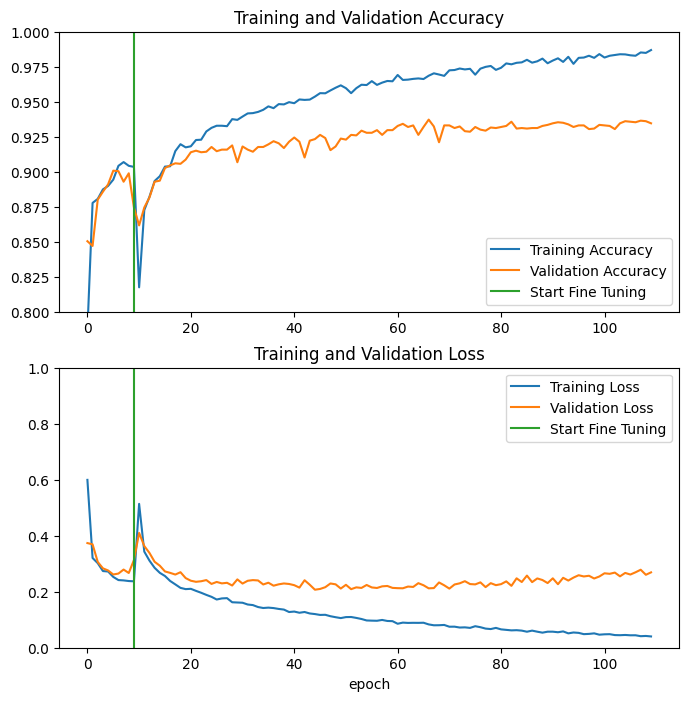

In [49]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [51]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9373 - loss: 0.2270
Test accuracy : 0.9232488870620728


Predictions:
 [0 0 0 0 0 0 0 0 0 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


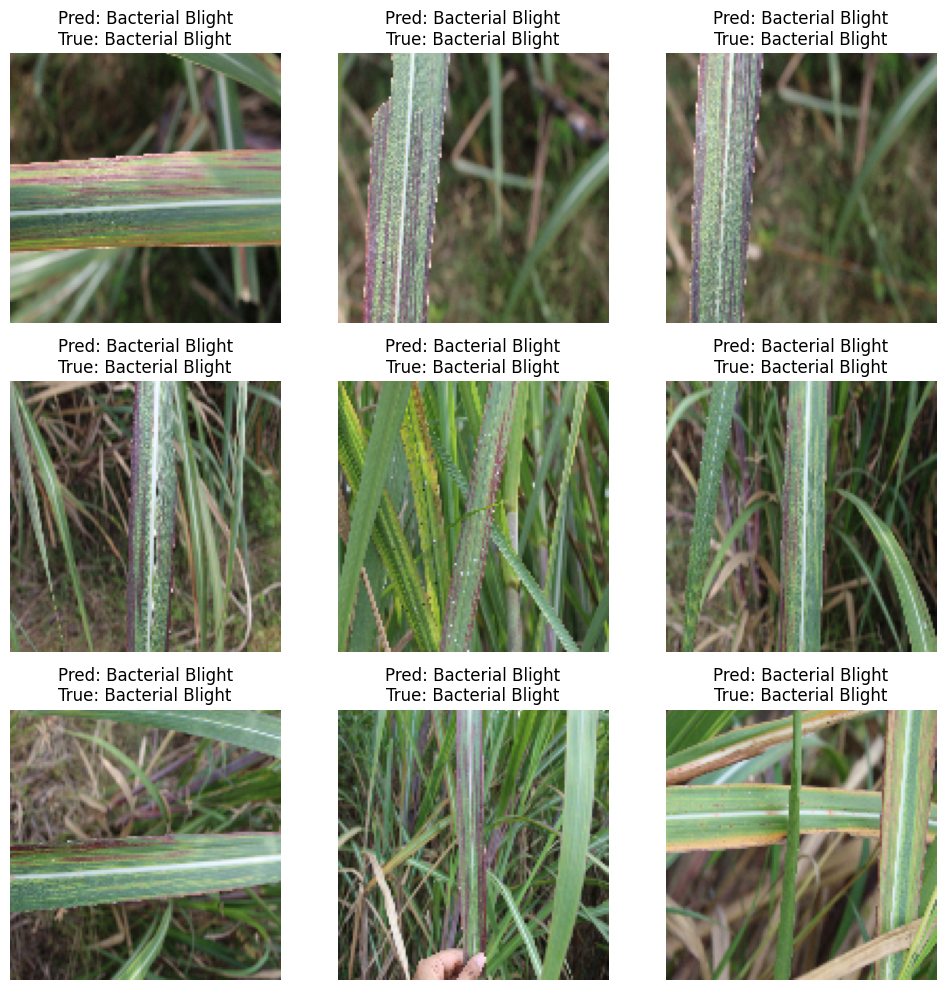

In [54]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Get the predicted class indices for multi-class classification
predicted_class_indices = tf.argmax(predictions, axis=1).numpy()


print('Predictions:\n', predicted_class_indices)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
# Display up to 9 images with their predicted and true labels
for i in range(min(9, len(image_batch))):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  # Display both predicted and true labels
  plt.title(f"Pred: {class_names[predicted_class_indices[i]]}\nTrue: {class_names[label_batch[i]]}")
  plt.axis("off")

plt.tight_layout()
plt.show()

In [56]:
model.save_weights('Crops_disease_prediction.weights.h5')

In [57]:
model.save('crops_disease_predication.keras')

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
